In [313]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [314]:
def monte_carlo_simulation(pity_s, guarantee, amount):
    char_result = []
    roll_to_limited_s = []
    rng_result = []
    # base probability
    prob_s = 0.006
    prob_a = 0.0705
    prob_b = 0.9235
    prob_guarantee_s = 0.5
    
    # hitung probabilitas kumulatif
    cum_prob_s = prob_s
    cum_prob_a = cum_prob_s + prob_a
    cum_prob_b = cum_prob_a + prob_b
    
    # track the amount of character
    count_standard_s = 0
    count_limited_s = 0
    count_a = 0
    count_b = 0
    
    # pity system
    pity_s = pity_s
    pity_a = 0
    # pity counter
    count_pity_s = 0
    count_pity_a = 0
    
    # check guarantee
    is_guarantee = guarantee
    
    # looping
    for i in range(amount):
        # random number
        roll = random.random()
        
        if pity_s >= 89:
            pity_s = 0
            pity_a = 0
            count_pity_s += 1
            if is_guarantee:
                count_limited_s += 1
                char_result.append('LS')
                roll_to_limited_s.append(i+1)
                is_guarantee = False
            else:
                if random.random() < prob_guarantee_s:
                    count_limited_s += 1
                    char_result.append('LS')
                    roll_to_limited_s.append(i+1)
                else:
                    count_standard_s += 1
                    char_result.append('S')
                    is_guarantee = True
        else:
            if roll < cum_prob_s:
                pity_s = 0
                pity_a = 0
                if is_guarantee:
                    count_limited_s += 1
                    char_result.append('LS')
                    is_guarantee = False
                    roll_to_limited_s.append(i+1)
                else:
                    if random.random() < prob_guarantee_s:
                        count_limited_s += 1
                        char_result.append('LS')
                        roll_to_limited_s.append(i+1)
                    else:
                        count_standard_s += 1
                        char_result.append('S')
                        is_guarantee = True
            elif roll < cum_prob_a:
                count_a += 1
                pity_s += 1
                pity_a = 0
                char_result.append('A')
            else:
                if pity_a >= 9:
                    count_a += 1
                    pity_s += 1
                    pity_a = 0
                    count_pity_a += 1
                    char_result.append('A')
                else:
                    count_b += 1
                    pity_s += 1
                    pity_a += 1
                    char_result.append('B')
        rng_result.append(roll)
    
    # summary
    print('Base Probabilty Karakter')
    print(f'probability S: {prob_s}\nprobability A: {prob_a}\nprobability B: {prob_b}')
    print(f'\nProbabilitas Kumulatif')
    print(f'Probabilitas S: {cum_prob_s}\nProbabilitas A: {cum_prob_a}\nProbabilitas B: {cum_prob_b}')
    
        
    
    return rng_result, char_result, roll_to_limited_s, count_limited_s, count_standard_s, count_a, count_b

## Input pity awal dan total simulasi

In [315]:
pity_awal = 11
guarantee = True
total_sim = 1000000

roll_cost = 160

#jika pity awal 90 maka reset jadi 0 jika melebihi 90 maka sisa dibagi 90
pity_awal = pity_awal if pity_awal < 90 else pity_awal%90
print(f'pity awal : {pity_awal}')

pity awal : 11


## Jalankan Simulasi

In [316]:
rng_result, char_result, roll_to_limited_s, count_limited_s, count_standart_s, count_a, count_b = monte_carlo_simulation(pity_awal, guarantee, total_sim)

Base Probabilty Karakter
probability S: 0.006
probability A: 0.0705
probability B: 0.9235

Probabilitas Kumulatif
Probabilitas S: 0.006
Probabilitas A: 0.0765
Probabilitas B: 1.0


## Hasil Simulasi

In [317]:
#jumlah total karakter S 
count_s = count_limited_s + count_standart_s
#probabilitas karakter
prob_limited_s = count_limited_s/total_sim
prob_s = count_s/total_sim
prob_a = count_a/total_sim
prob_b = count_b/total_sim

print(f'Hasil simulasi setelah {total_sim} kali pull')

print(f'\nJumlah karakter\n---------------------')
print(f'Limited S: {count_limited_s}')
print(f'S: {count_s}')
print(f'A: {count_a}')
print(f'B: {count_b}')

print(f'\nProbabilitas karakter \n---------------------')
print(f'Limited S: {prob_limited_s*100:.2f}%')
print(f'S: {prob_s*100:.2f}%')
print(f'A: {prob_a*100:.2f}%')
print(f'B: {prob_b*100:.2f}%')

Hasil simulasi setelah 1000000 kali pull

Jumlah karakter
---------------------
Limited S: 9578
S: 14391
A: 129642
B: 855967

Probabilitas karakter 
---------------------
Limited S: 0.96%
S: 1.44%
A: 12.96%
B: 85.60%


### Karakter S in General

In [318]:
# average pull needed (ditambah 1 karena index mulai dari 0)
rolls_to_get_s = [index + 1 for index, char in enumerate(char_result) if char == 'S' or char == 'LS']
print(f'Rolls at which character S was obtained: {rolls_to_get_s}')

first_roll = rolls_to_get_s[0]+pity_awal
interval_rolls_to_s = [first_roll] + [rolls_to_get_s[i] - rolls_to_get_s[i-1] for i in range(1, len(rolls_to_get_s))]

print(f'Rolls to get character S: {interval_rolls_to_s}')

print(f'\n\nSummary\n---------------------')
average_s = np.mean(interval_rolls_to_s)
print(f'Average rolls to get character S: {average_s:.1f} Pulls')
print(f'Average cost to get character S: {average_s*roll_cost:.1f} Polychromes')

#pull needed to get the character from pity awal
print(f'---------------------')
print(f'Pity awal : {pity_awal}')
pull_needed = average_s - pity_awal 
print(f'Pull needed to get the character based on pity awal : {pull_needed:.0f} Pulls')
print(f'Cost needed to get limited character S: {pull_needed*roll_cost:.0f} Polychromes')


amount_pity_s = interval_rolls_to_s.count(90)
print(f'\nPity\n---------------------')
print(f'Amount of pity S: {amount_pity_s}')
print(f'Probability of getting unlucky: {(amount_pity_s/total_sim)*100:.3f}%')

Rolls at which character S was obtained: [26, 116, 206, 296, 386, 476, 481, 485, 575, 665, 755, 760, 850, 940, 1030, 1035, 1125, 1215, 1305, 1395, 1438, 1528, 1618, 1708, 1730, 1769, 1859, 1949, 1972, 2044, 2055, 2063, 2153, 2243, 2333, 2423, 2511, 2601, 2650, 2669, 2718, 2808, 2830, 2913, 2979, 3069, 3090, 3102, 3192, 3282, 3372, 3462, 3552, 3560, 3650, 3731, 3748, 3797, 3850, 3862, 3952, 4042, 4073, 4163, 4253, 4343, 4433, 4523, 4583, 4600, 4690, 4723, 4735, 4821, 4911, 4938, 5028, 5062, 5152, 5172, 5262, 5320, 5410, 5454, 5491, 5581, 5631, 5721, 5758, 5834, 5924, 5985, 6073, 6100, 6117, 6207, 6297, 6351, 6380, 6458, 6548, 6566, 6656, 6732, 6822, 6825, 6915, 7005, 7095, 7107, 7197, 7287, 7377, 7467, 7557, 7582, 7672, 7762, 7771, 7861, 7951, 7998, 8088, 8178, 8268, 8352, 8442, 8532, 8622, 8712, 8745, 8835, 8862, 8952, 8958, 9048, 9138, 9218, 9242, 9332, 9422, 9512, 9602, 9625, 9643, 9733, 9770, 9860, 9950, 10040, 10130, 10220, 10250, 10340, 10430, 10458, 10548, 10638, 10728, 10785, 10

### Karakter Limited S

In [319]:
print(roll_to_limited_s)
#Check if got limited character S first
#Kalo gadapet limited duluan gaperlu ditambah dg pity awal
first_roll = roll_to_limited_s[0] if rolls_to_get_s[0]<roll_to_limited_s[0] else roll_to_limited_s[0] + pity_awal

interval_limited_s = [first_roll] + [roll_to_limited_s[i] - roll_to_limited_s[i-1] for i in range(1, len(roll_to_limited_s))]
print(f'\nRolls at which limited character S was obtained: \n{interval_limited_s}')

print(f'\n\nSummary\n---------------------')
average_limited_s = np.mean(interval_limited_s)
print(f'Average rolls to get limited character S: {average_limited_s:.1f} Pulls')
print(f'Average cost to get limited character S: {average_limited_s*roll_cost:.1f} Polychromes')

#pull needed to get the character from pity awal
print(f'---------------------')
print(f'Pity awal : {pity_awal}')
print(f'Pull needed to get the character based on pity awal : {average_limited_s - pity_awal:.0f} Pulls')
print(f'Cost needed to get limited character S: {(average_limited_s - pity_awal)*roll_cost:.0f} Polychromes')

#pity counter
amount_pity_s = interval_limited_s.count(90)
print(f'\nPity\n---------------------')
print(f'Amount of pity S: {amount_pity_s}')
print(f'Probability of getting unlucky {(amount_pity_s/total_sim)*100:.3f}%')

[26, 206, 296, 476, 485, 665, 755, 850, 940, 1035, 1215, 1395, 1528, 1618, 1708, 1769, 1859, 1972, 2044, 2055, 2153, 2243, 2333, 2423, 2601, 2650, 2718, 2830, 2913, 3069, 3102, 3192, 3372, 3552, 3650, 3731, 3748, 3797, 3850, 3952, 4042, 4073, 4253, 4433, 4583, 4600, 4723, 4735, 4911, 4938, 5028, 5152, 5262, 5410, 5454, 5491, 5631, 5758, 5924, 5985, 6100, 6117, 6207, 6297, 6351, 6458, 6548, 6656, 6732, 6822, 6825, 6915, 7095, 7197, 7377, 7467, 7557, 7582, 7762, 7771, 7861, 7998, 8178, 8352, 8442, 8622, 8712, 8745, 8835, 8862, 8958, 9048, 9218, 9332, 9512, 9602, 9625, 9643, 9770, 9860, 10040, 10220, 10340, 10430, 10458, 10548, 10728, 10875, 10965, 11044, 11134, 11224, 11237, 11327, 11373, 11553, 11660, 11826, 11899, 11948, 12038, 12081, 12261, 12411, 12546, 12625, 12805, 12905, 12935, 13024, 13114, 13141, 13193, 13296, 13476, 13597, 13699, 13789, 13969, 14097, 14277, 14369, 14459, 14549, 14729, 14819, 14999, 15179, 15335, 15515, 15543, 15558, 15662, 15752, 15801, 15891, 16032, 16122, 161

## Tabel

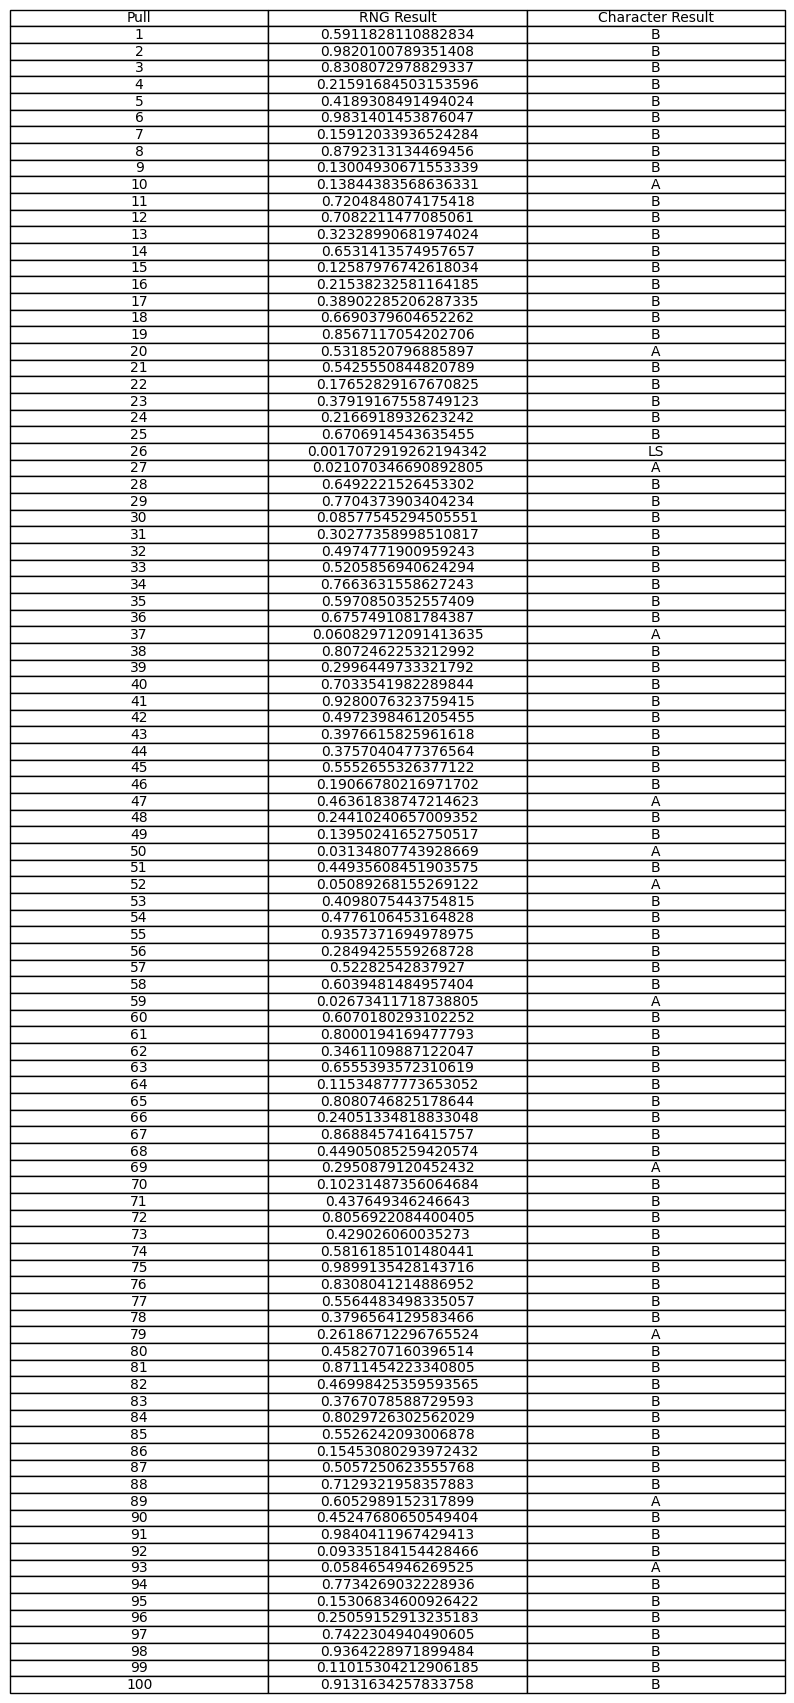

In [320]:
data = {
    'Pull': range(1, total_sim + 1),
    'RNG Result': rng_result,
    'Character Result': char_result
}

df = pd.DataFrame(data)

# Plot the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=df.head(100).values, colLabels=df.columns, cellLoc='center', loc='center')

plt.show()

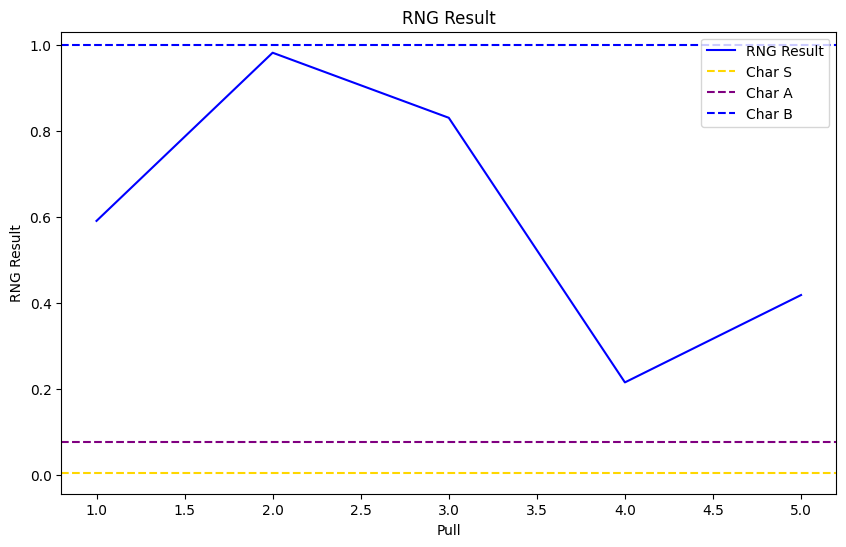

In [321]:
plt.figure(figsize=(10, 6))
plt.plot(df['Pull'].head(5), df['RNG Result'].head(5), color='blue', label='RNG Result')
plt.axhline(y=0.006, color='gold', linestyle='--', label='Char S')
plt.axhline(y=0.078, color='purple', linestyle='--', label='Char A')
plt.axhline(y=1, color='blue', linestyle='--', label='Char B')
plt.xlabel('Pull')
plt.ylabel('RNG Result')
plt.title('RNG Result')
plt.legend(loc='upper right')
plt.show()